Here we roughly reproduce the results of the paper
[Simulating the Sycamore quantum supremacy circuits - Pan & Zhang](https://scirate.com/arxiv/2103.03074).
There are of course many practical aspects of actually performing the contraction that we ignore here,
instead just investigating the contraction complexity of the core task of computing a single marginal
probability distribution of 21 qubits (enough to generate a slice of >2 million correlated amplitudes).

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn

import cotengra as ctg

Load the circuit:

In [2]:
circ = qtn.Circuit.from_qasm_file("circuit_n53_m20_s0_e0_pABCDCDAB.qsim")

Instantiate a path optimizer:

In [3]:
opt = ctg.HyperOptimizer(
    slicing_reconf_opts={"target_size": 2**30},  # dynamically slice to W=30
    max_repeats=1000,  # sample 1000 contraction trees
    parallel="ray",
    progbar=True,
)

2021-03-07 20:32:52,265	INFO services.py:1090 -- View the Ray dashboard at http://127.0.0.1:8268


Rehearse contracting a 21 qubit marginal ([see quimb](https://quimb.readthedocs.io/en/latest/tensor-circuit.html#Generate-samples-from-a-chaotic-circuit)
for what this is doing, the functional difference is we would take *all* the high probability
strings from this marginal rather than a single one):

In [4]:
rehs = circ.sample_chaotic_rehearse(
    circ.calc_qubit_ordering()[-21:], optimize=opt
)

log2[SIZE]: 30.00 log10[FLOPs]: 18.96: 100%|██████████| 1000/1000 [3:21:14<00:00, 12.07s/it]


Retrieve the (dynamically sliced) contraction tree:

In [5]:
tree = opt.get_tree()

Check the contraction cost / time complexity (n.b. this is half what's displayed
above as in units not specific to real dtypes):

In [6]:
f"{tree.contraction_cost():e}"

'4.595391e+18'

In the paper the total time complexity is reported as $4.51 \times 10^{18}$, so,
practical efficiency considerations aside (which are not trivial!) this is
very similar.

In [7]:
len(tree.sliced_inds)

23

We can also look at the optimizer progression:

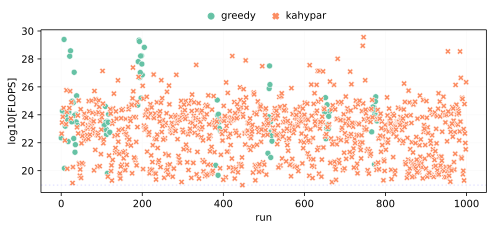

In [8]:
opt.plot_trials("flops")

And visualize the actual contraction tree:

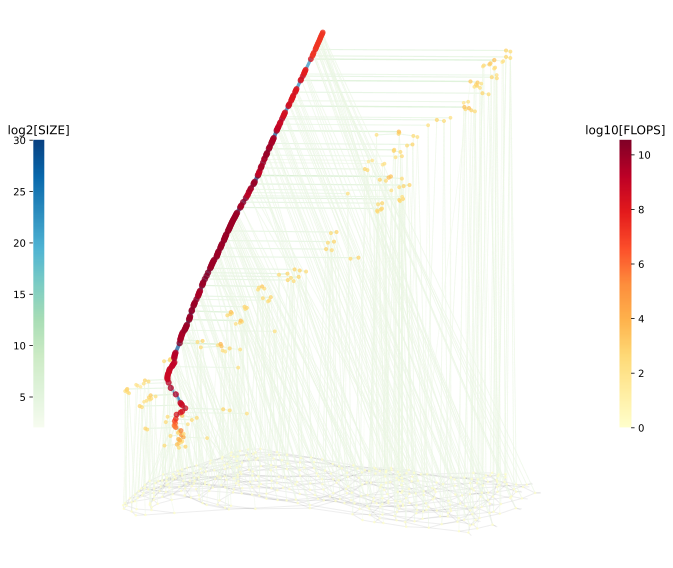

In [9]:
tree.plot_tent(order=True, figsize=(8, 8))